<a href="https://colab.research.google.com/github/Coder-Wasim/Learning/blob/main/Visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Visualization with Matplotlib and Seaborn

### Have Fun!

### Exercise 7: Plotting Data with Matplotlib and Seaborn

In [ ]:
# run the cell!
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
# run the cell!
listings = pd.read_csv("listings_clean.csv")
# listings = pd.read_csv("listings.csv")
listings.head()

,Symbol,Exchange,Name,Last_Price,Market_Cap,IPO_Year,Sector,Industry
0,A,NYSE,"Agilent Technologies, Inc.",81.68,25934696179.92,1999,Capital Goods,Biotechnology: Laboratory Analytical Instruments
1,AA,NYSE,Alcoa Corporation,29.15,5407809589.60,2016,Basic Industries,Aluminum
2,AABA,NASDAQ,Altaba Inc.,75.39,42781131315.30,1969,Technology,EDP Services
3,AAC,NYSE,"AAC Holdings, Inc.",2.16,53141086.80,2014,Health Care,Medical Specialities
4,AAL,NASDAQ,"American Airlines Group, Inc.",34.02,15276869742.96,1969,Transportation,Air Freight/Delivery Services


In [ ]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6852 entries, 0 to 6851
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Symbol      6852 non-null   object 
 1   Exchange    6852 non-null   object 
 2   Name        6852 non-null   object 
 3   Last_Price  6852 non-null   float64
 4   Market_Cap  5954 non-null   float64
 5   IPO_Year    6852 non-null   int64  
 6   Sector      5309 non-null   object 
 7   Industry    5309 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 428.4+ KB


In [ ]:
# run the cell -> Sort listings by IPO_Year & Create new RangeIndex
listings = listings.sort_values("IPO_Year", ascending = True).reset_index(drop = True)
listings.head()

,Symbol,Exchange,Name,Last_Price,Market_Cap,IPO_Year,Sector,Industry
0,VFF,NASDAQ,"Village Farms International, Inc.",13.67,651516806.79,1969,Consumer Non-Durables,Farming/Seeds/Milling
1,HBANN,NASDAQ,Huntington Bancshares Incorporated,26.58,2658000.00,1969,Finance,Major Banks
2,HBANO,NASDAQ,Huntington Bancshares Incorporated,26.25,5250000.00,1969,Finance,Major Banks
3,HBCP,NASDAQ,"Home Bancorp, Inc.",35.77,339297765.80,1969,Finance,Banks
4,HBI,NYSE,Hanesbrands Inc.,18.02,6513703996.20,1969,Consumer Services,Clothing/Shoe/Accessory Stores


68. __Import__ matplotlib.pyplot (as plt) and set the __style__ to __"seaborn"__! __Fill in the gaps!__

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('grayscale')

69. __Create__ the graph below (lineplot for all numerical columns, figsize = (15,15))! __Fill in the gaps__!

In [ ]:
flt_lst = listings.dtypes == 'float64'
listings[flt_lst[listings.dtypes == 'float64'].index.to_list()]
# OR
listings.select_dtypes('float64')


,Last_Price,Market_Cap
0,81.68,25934696179.92
1,29.15,5407809589.60
2,75.39,42781131315.30
3,2.16,53141086.80
4,34.02,15276869742.96
...,...,...
6847,26.72,681919062.56
6848,19.79,2147266454.00
6849,15.74,504078206.26
6850,7.85,165399468.60


array([<Axes: >, <Axes: >], dtype=object)

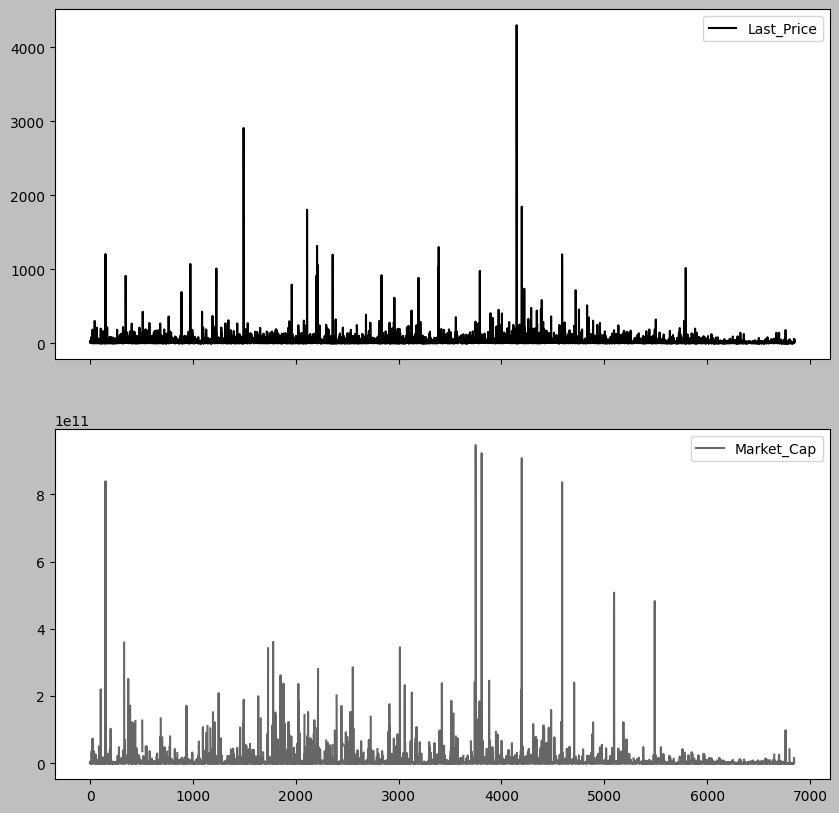

In [ ]:
listings.select_dtypes('float64').plot(subplots=True , figsize = (10,10))

<Axes: >

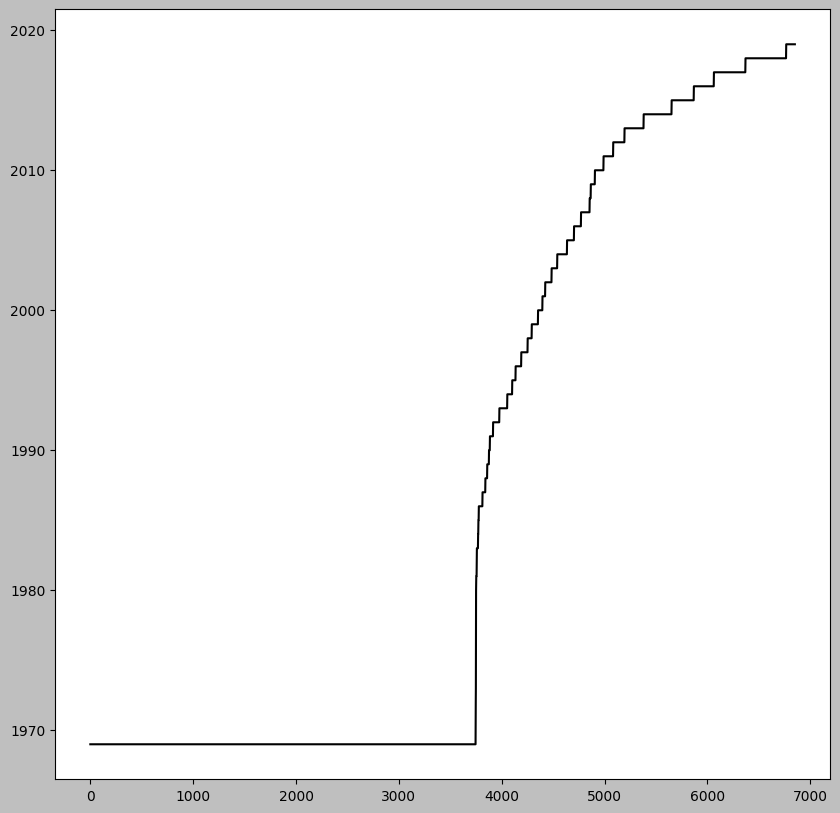

In [ ]:
listings.IPO_Year.plot( figsize = (10,10))

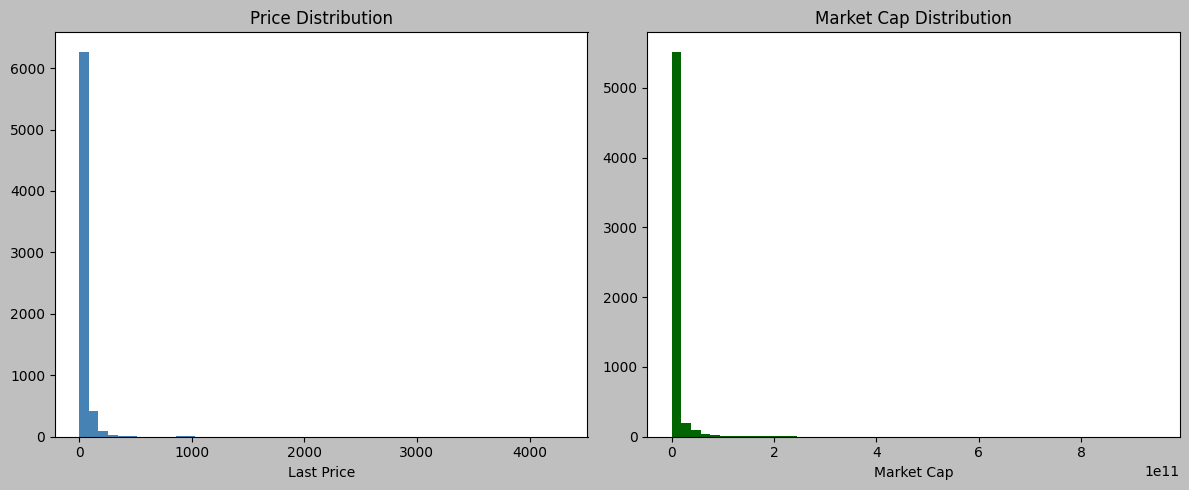

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(listings['Last_Price'].dropna(), bins=50, color='steelblue')
plt.title("Price Distribution")
plt.xlabel("Last Price")

plt.subplot(1, 2, 2)
plt.hist(listings['Market_Cap'].dropna(), bins=50, color='darkgreen')
plt.title("Market Cap Distribution")
plt.xlabel("Market Cap")

plt.tight_layout()
plt.show()

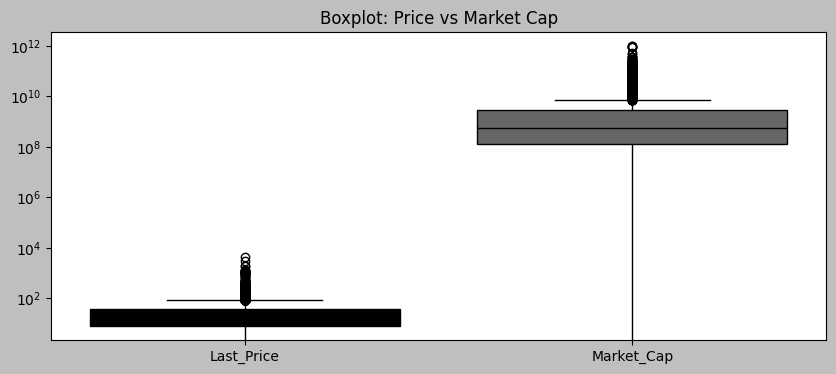

In [ ]:
plt.figure(figsize=(10, 4))
sns.boxplot(data=listings[['Last_Price', 'Market_Cap']])
plt.yscale('log')  # Helps with extreme values
plt.title("Boxplot: Price vs Market Cap")
plt.show()

70. __Create__ the graph below (Histogramm for the __"Last_Price"__ column with 200 bins and figsize of (12, 8)! <br>
Select listings with __Last_Price < 200__ only! __Fill in the gaps__!

In [ ]:
listings['Last_Price'].dropna().describe()

,Last_Price
count,6852.00
mean,36.79
std,98.58
min,0.00
25%,7.70
50%,19.98
75%,36.85
max,4299.99


In [ ]:
listings['Last_Price'].quantile([0.90, 0.95, 0.99])

,Last_Price
0.90,78.34
0.95,117.33
0.99,271.58


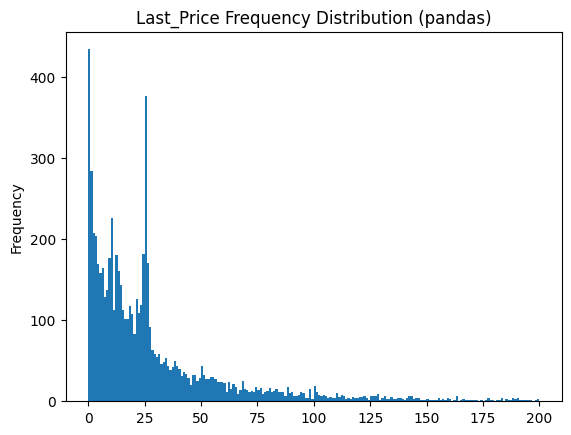

In [ ]:
Last_Price = listings['Last_Price'].dropna().sort_values(ascending=False)#<200
Last_Price[Last_Price< 200].plot(kind='hist', bins=200)
plt.title('Last_Price Frequency Distribution (pandas)')
plt.show()

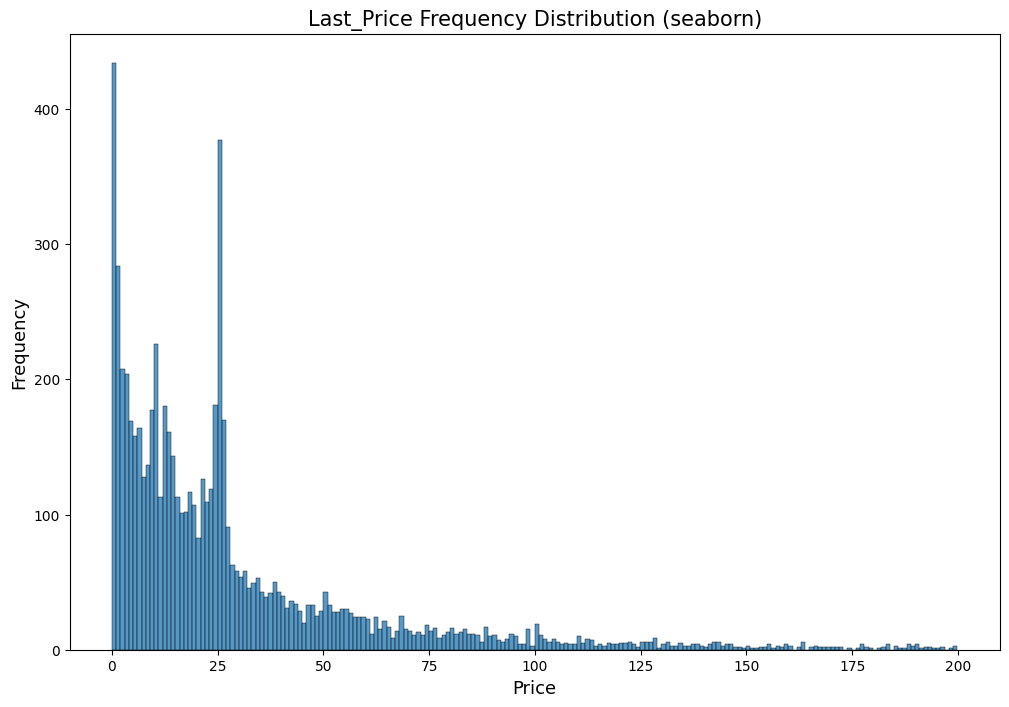

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.histplot(data=listings[listings['Last_Price'] < 200], x='Last_Price', bins=200)
plt.title("Last_Price Frequency Distribution (seaborn)", fontsize=15)
plt.xlabel("Price", fontsize=13)
plt.ylabel("Frequency", fontsize=13)
# plt.grid(True)
plt.show()


71. __Create__ the graph below (Scatterplot with __Last_Price__ on x-axis, __Market_Cap__ on y-axis and __IPO_Year__ as color)! __Fill in the gaps!__ <br><br>
(Note: by setting xlim and ylim we are limiting our plot to listings with price < 200 and market cap < 10 billion. By setting vmin to 1990, we are scaling the colormap in a way that all listings before 1990 are deep violet.)

Text(0.5, 1.0, 'Price vs. Market Cap')

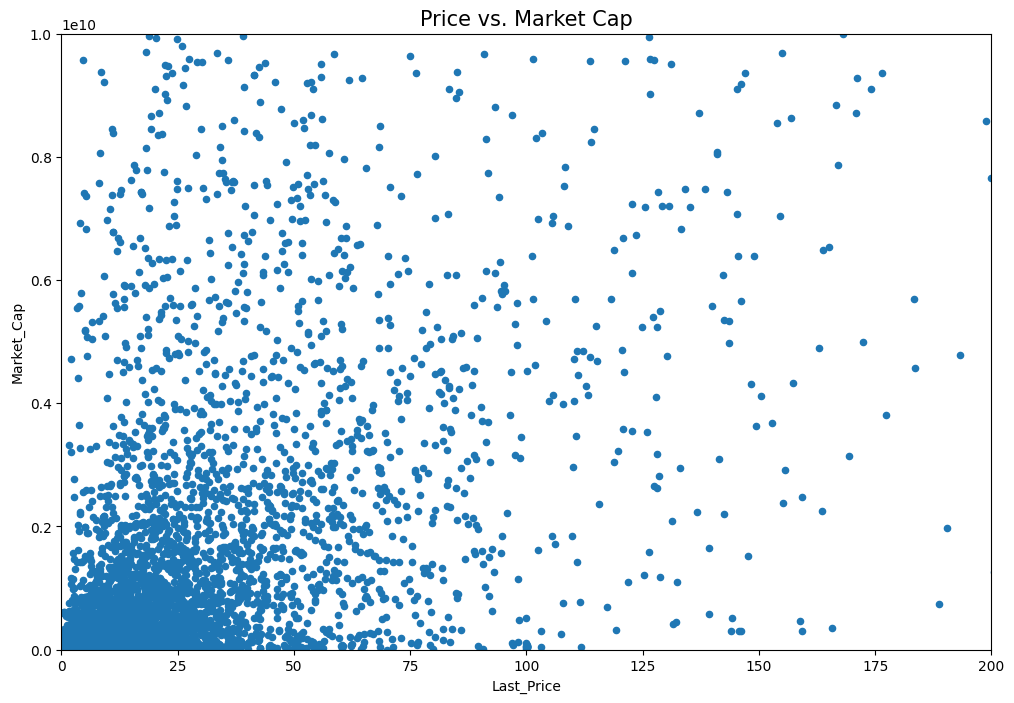

In [ ]:
listings.plot(kind ='scatter',x = "Last_Price", y = "Market_Cap",xlim=(0, 200),  ylim=(0, 10_000_000_000),figsize=(12, 8),)
plt.title("Price vs. Market Cap", fontsize = 15)

Text(0.5, 1.0, 'Price vs. Market Cap')

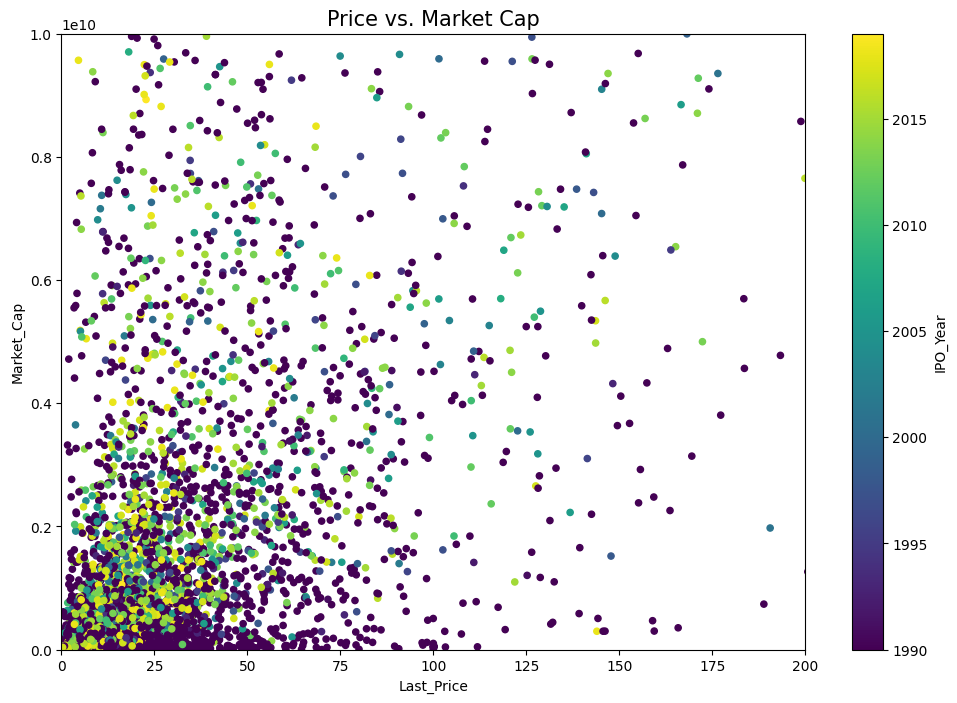

In [ ]:
listings.plot(
    kind='scatter',
    x='Last_Price',
    y='Market_Cap',
    c='IPO_Year',  # <== color encoded by year or other numeric column
    colormap='viridis',
    figsize=(12, 8),
    xlim=(0, 200),
    ylim=(0, 10_000_000_000),
    vmin=1990
)
plt.title("Price vs. Market Cap", fontsize = 15)

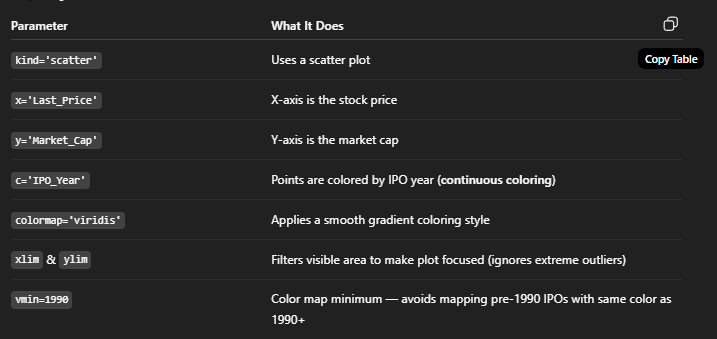

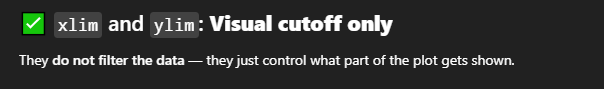

In [ ]:
# run the cell!
listings.head()

72. __Import__ Seaborn (as sns)!

,IPO_Year
0,False
1,True
2,False
3,True
4,False
...,...
6847,True
6848,True
6849,True
6850,True


73. __Create__ the following __countplot__! It should show the number/count of listings per Exchange per IPO_Year starting from 2001. __Fill in the gaps!__

<Axes: title={'center': 'Basic'}, xlabel='IPO_Year', ylabel='count'>

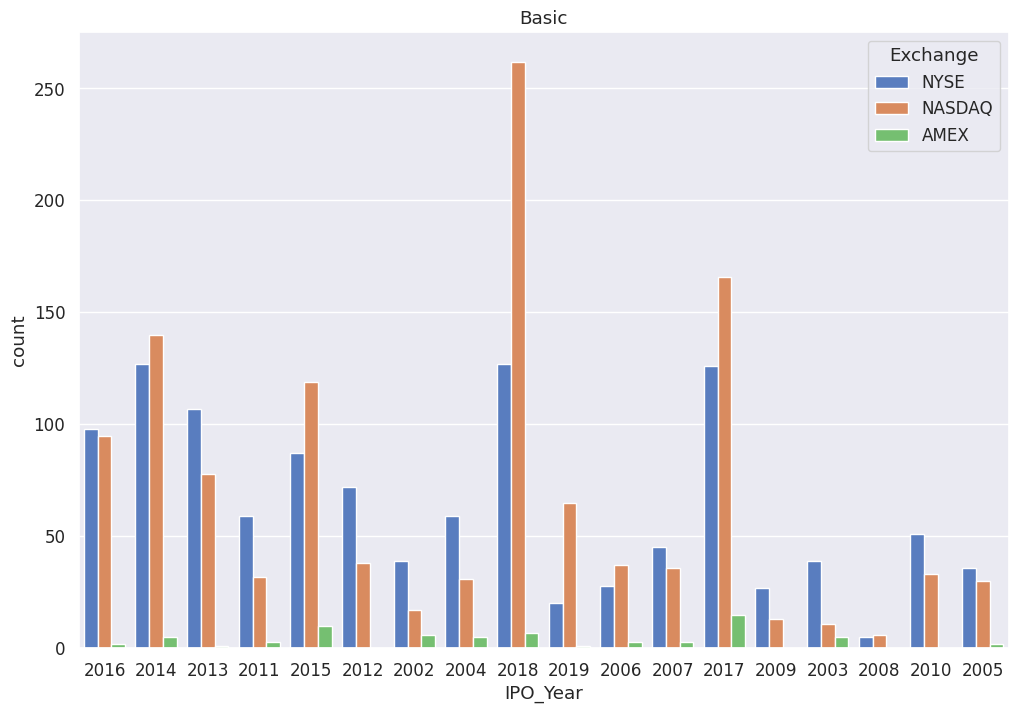

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Basic')

sns.countplot(
    data=listings[listings['IPO_Year'] > 2001].astype(str) # hue will dsiply for all years for interval used int DT
    ,x='IPO_Year'
    ,hue='Exchange'
    ,dodge=True #space between hue
    ,palette='muted'
    )

/tmp/ipython-input-34-2665506867.py:5: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:steelblue'` for the same effect.

  sns.countplot(


<Axes: title={'center': 'Profesional'}, xlabel='IPO_Year', ylabel='count'>

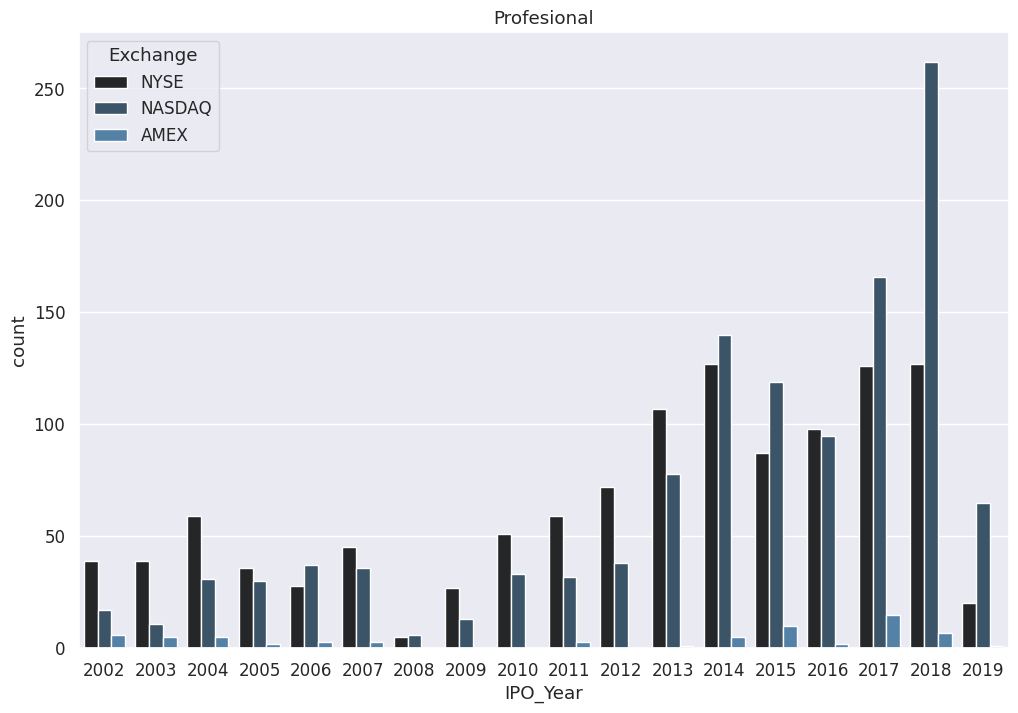

In [ ]:
# sns.set(font_scale=1.1, palette="viridis")
plt.figure(figsize=(12,8))
plt.title('Profesional')

sns.countplot(
    data=listings[listings['IPO_Year'] > 2001]
    ,x='IPO_Year'
    ,hue='Exchange'
    ,dodge=True
    ,color='steelblue'
    )

In [ ]:
print(sns.palettes.SEABORN_PALETTES.keys())

dict_keys(['deep', 'deep6', 'muted', 'muted6', 'pastel', 'pastel6', 'bright', 'bright6', 'dark', 'dark6', 'colorblind', 'colorblind6'])


74. __Create__ the following plot! __Fill in the gaps!__ Do you think that the lower market capitalization of stocks being AMEX listed is __statistically significant__?

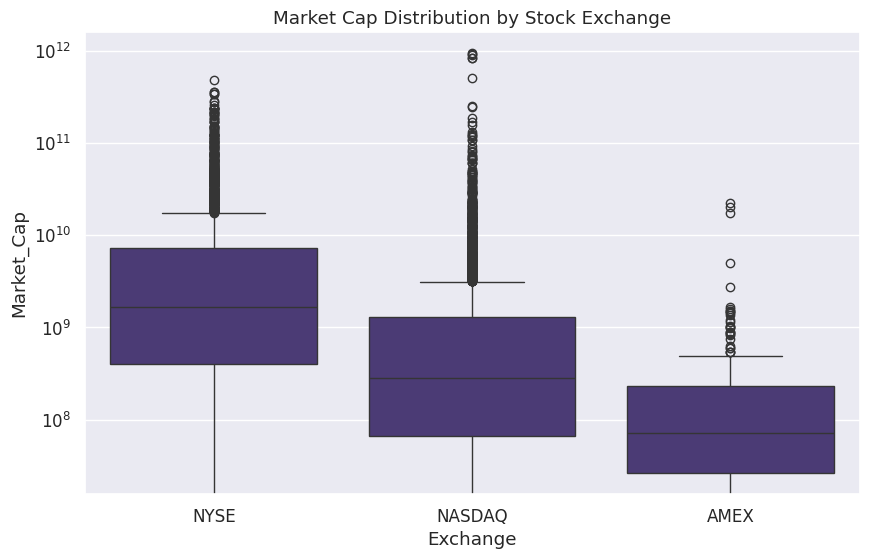

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(data=listings, x='Exchange', y='Market_Cap')
plt.title("Market Cap Distribution by Stock Exchange")
plt.yscale("log")  # Market Cap is highly skewed
plt.show()


In [ ]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.0)
sns.---(data = ---, x = "Exchange", y = "---", dodge = True)
plt.show()

In [ ]:
from scipy.stats import ttest_ind

amex_cap = listings[listings['Exchange'] == 'AMEX']['Market_Cap'].dropna()
nyse_cap = listings[listings['Exchange'] == 'NYSE']['Market_Cap'].dropna()

stat, p_value = ttest_ind(amex_cap, nyse_cap, equal_var=False)

print(f"P-Value: {p_value:.5f}")


P-Value: 0.00000


It seems to be significant. Listings on the AMEX have - on average - a lower Market Capitalization.

__Import__ the __matrix1.csv__ file and save the DataFrame in the variable __matrix1__. __Inspect__! <br><br>
(Note: The matrix1 dataset is an aggregation of the listings dataset and shows the number of listings per IPO_Year per Sector.)

75. __Create__ the follwing  Seaborn __heatmap__ by using the __matrix1__ dataset. __Fill in the gaps!__ <br>
Which were the __hot Sectors__ in terms of listings in the period __2013-2018__?

In [ ]:
matrix1 = pd.read_csv("matrix1.csv", index_col = "IPO_Year")
matrix1.head(7).T#.pivot(index = 'IPO_Year')

IPO_Year,1990,1991,1992,1993,1994,1995,1996
Basic Industries,1,0,2,3,5,1,5
Capital Goods,1,2,4,8,5,4,3
Consumer Durables,0,1,0,4,2,1,1
Consumer Non-Durables,0,1,1,6,1,3,7
Consumer Services,0,6,9,18,11,7,8
Energy,1,0,1,2,1,2,1
Finance,0,4,4,2,2,2,3
Health Care,1,5,8,1,3,2,6
Miscellaneous,0,0,2,0,1,0,0
Public Utilities,0,0,0,0,4,1,1


In [ ]:
# run the cell!
matrix1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 1990 to 2019
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Basic Industries       30 non-null     int64
 1   Capital Goods          30 non-null     int64
 2   Consumer Durables      30 non-null     int64
 3   Consumer Non-Durables  30 non-null     int64
 4   Consumer Services      30 non-null     int64
 5   Energy                 30 non-null     int64
 6   Finance                30 non-null     int64
 7   Health Care            30 non-null     int64
 8   Miscellaneous          30 non-null     int64
 9   Public Utilities       30 non-null     int64
 10  Technology             30 non-null     int64
 11  Transportation         30 non-null     int64
dtypes: int64(12)
memory usage: 3.0 KB


<Axes: ylabel='IPO_Year'>

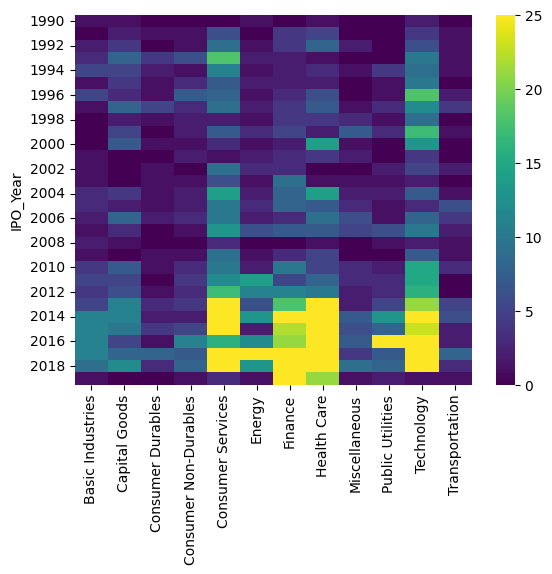

In [ ]:
sns.heatmap(data= matrix1,cmap = "viridis", vmax = 25)

In [ ]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.0)
sns.---(---, cmap = "viridis", vmax = 25)
plt.show()

Hot Sectors were ... Customer Services, Finance, Health Care and Technology.

# Well Done!

-----------------------------

# Continued.....................

##Strip and Swam plot

In [ ]:
listings.head()

,Symbol,Exchange,Name,Last_Price,Market_Cap,IPO_Year,Sector,Industry
0,A,NYSE,"Agilent Technologies, Inc.",81.68,25934696179.92,1999,Capital Goods,Biotechnology: Laboratory Analytical Instruments
1,AA,NYSE,Alcoa Corporation,29.15,5407809589.60,2016,Basic Industries,Aluminum
2,AABA,NASDAQ,Altaba Inc.,75.39,42781131315.30,1969,Technology,EDP Services
3,AAC,NYSE,"AAC Holdings, Inc.",2.16,53141086.80,2014,Health Care,Medical Specialities
4,AAL,NASDAQ,"American Airlines Group, Inc.",34.02,15276869742.96,1969,Transportation,Air Freight/Delivery Services


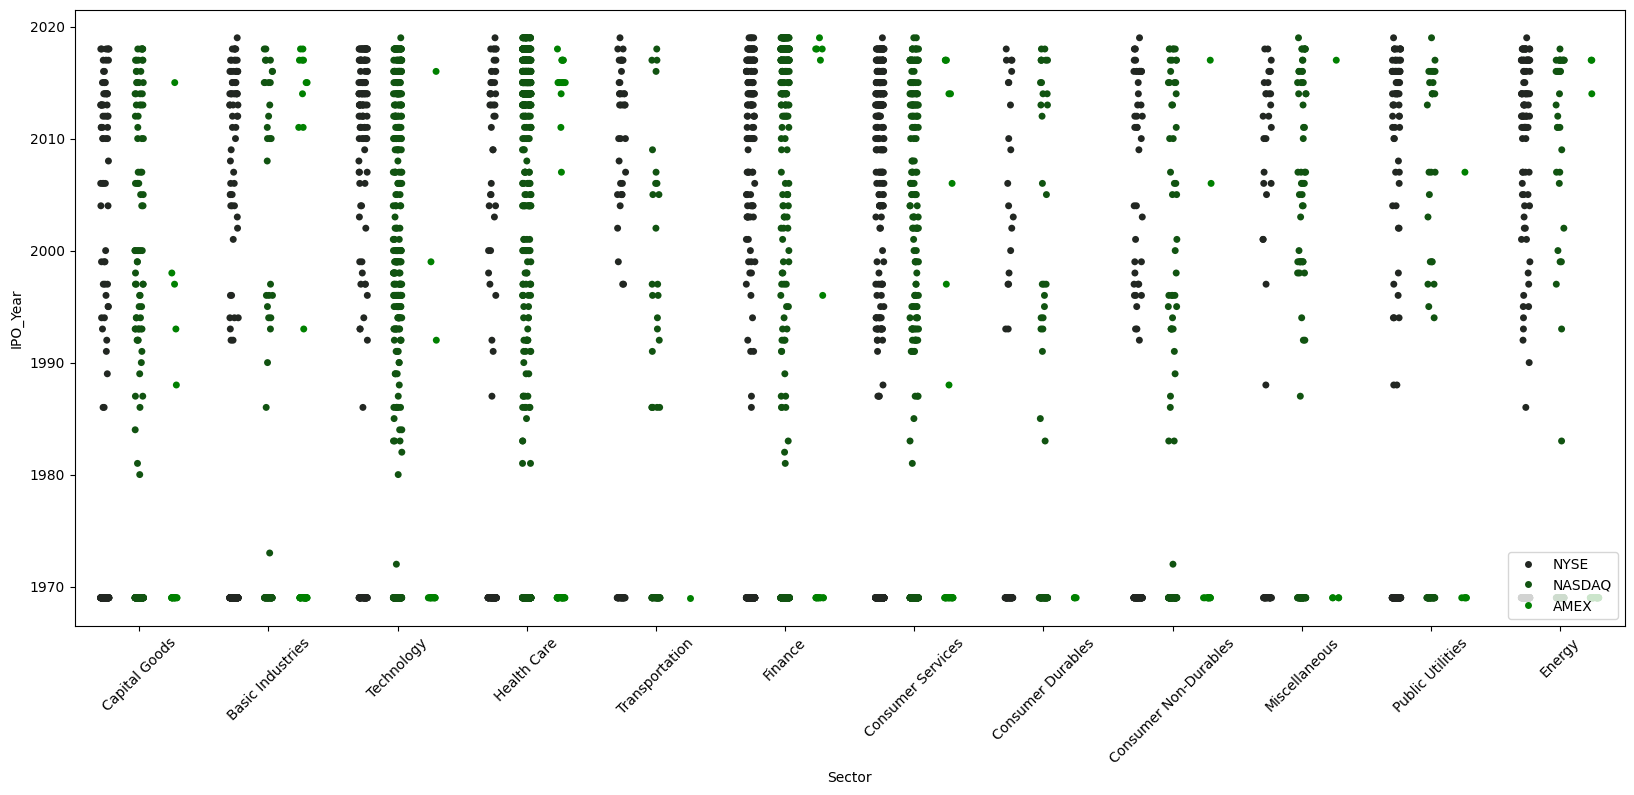

In [ ]:
plt.figure(figsize=(20,8))
sns.stripplot(data = listings , x = 'Sector' , y= 'IPO_Year' , jitter= True ,dodge= True,palette='dark:g',hue='Exchange' )
plt.legend(loc='lower right')
plt.xticks(rotation=45)
plt.show()

In [ ]:
listings['Sector'].drop_duplicates().dropna().to_list().so

## Bar Graph with lables

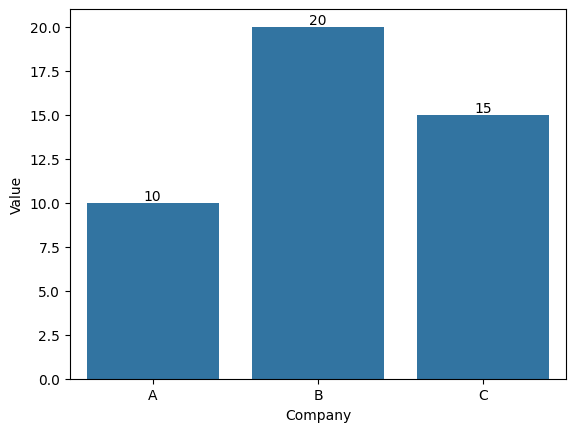

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

data = {'Company': ['A', 'B', 'C'], 'Value': [10, 20, 15]}
df = pd.DataFrame(data)

ax = sns.barplot(x='Company', y='Value', data=df)
ax.bar_label(ax.containers[0])  # 🔥 Adds labels automatically
plt.show()
